In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import transforms, datasets
import torch.utils.data as data

torch.backends.cudnn.benchmark = True

import deeptriplet.models
import deeptriplet.datasets
import deeptriplet.transforms as ctr

In [25]:
from random import shuffle

class DavisFrameSampler(object):
    r"""Base class for all Samplers.

    Every Sampler subclass has to provide an __iter__ method, providing a way
    to iterate over indices of dataset elements, and a __len__ method that
    returns the length of the returned iterators.
    """

    def __init__(self, davis, n_samples):
        self.davis = davis
#         self.num_seq = num_seq
        self.n_samples = n_samples
        
        self.img_count = 0
        imgs = []
        for i in range(len(davis)):
            self.img_count += dataset.count_frames(i)
            
            for j in range( dataset.count_frames(i)):
                imgs.append([i,j])
        
        self.imgs = imgs
                
    def __iter__(self):
        samples = []
        for i in np.random.permutation(self.img_count):
            frame0 = self.imgs[i]
            frames = [frame0]
            
            candidates = list(range(dataset.count_frames(frame0[0])))
            del candidates[frame0[1]]
            candidates = np.array(candidates, dtype=np.int32)
            for f in np.random.choice(candidates, size=self.n_samples):
                frames.append([frame0[0], f])
                
            samples.append(frames)

        return iter(samples)

    def __len__(self):
        return self.img_count



In [26]:
dataset = deeptriplet.datasets.Davis2017(root="/scratch-second/yardima/datasets/Davis2017/", 
                                         train=True,
                                         transforms=transforms.Compose([ctr.ToTensor(),
                                                                        ctr.NormalizeImagenet()]))

sampler = DavisFrameSampler(dataset,2)

In [31]:
trainloader = torch.utils.data.DataLoader(dataset, batch_sampler=sampler, num_workers=8)

torch.Size([3, 3, 480, 854])
torch.Size([3, 480, 854])


<IPython.core.display.Javascript object>


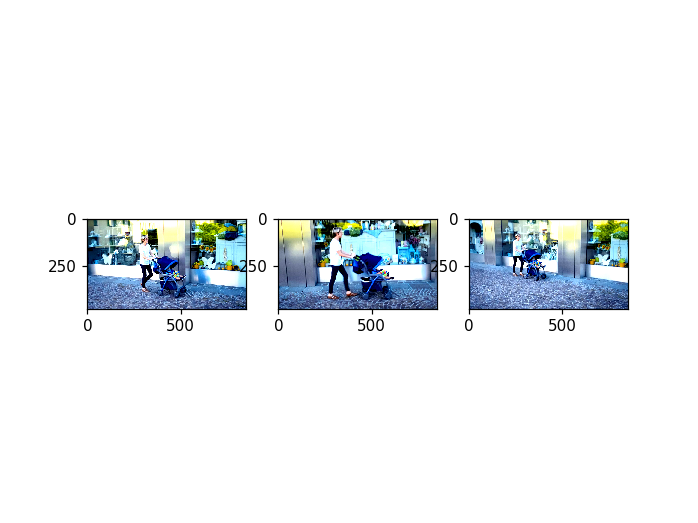

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [36]:
for s in trainloader:
    print(s['image'].shape)
    print(s['label'].shape)
    
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(np.transpose(s['image'][0].numpy(),axes=(1,2,0)) / 2 + 0.5)
    
    plt.subplot(1,3,2)
    plt.imshow(np.transpose(s['image'][1].numpy(),axes=(1,2,0)) / 2 + 0.5)
    
    plt.subplot(1,3,3)
    plt.imshow(np.transpose(s['image'][2].numpy(),axes=(1,2,0)) / 2 + 0.5)
    
    break

In [ ]:
for i in range()

In [11]:
a = np.array([[1,2],[5,8]])

In [15]:
a[np.array([1,0])]


array([[5, 8],
       [1, 2]])

In [ ]:
iter()